In [ ]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.datasets import fetch_openml
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# **Load the MNIST dataset**

In [ ]:
mnist = fetch_openml('mnist_784')
X, y = mnist.data, mnist.target.astype(int)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [ ]:
X

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Convert X to a NumPy array
X = np.array(X)

In [ ]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

# **Data Preprocessing**

In [ ]:
X = X / 255.0
X = X.reshape(-1, 28, 28)  # Reshape the images to 28x28

In [ ]:
X.shape

(70000, 28, 28)

# **Data Visualization**

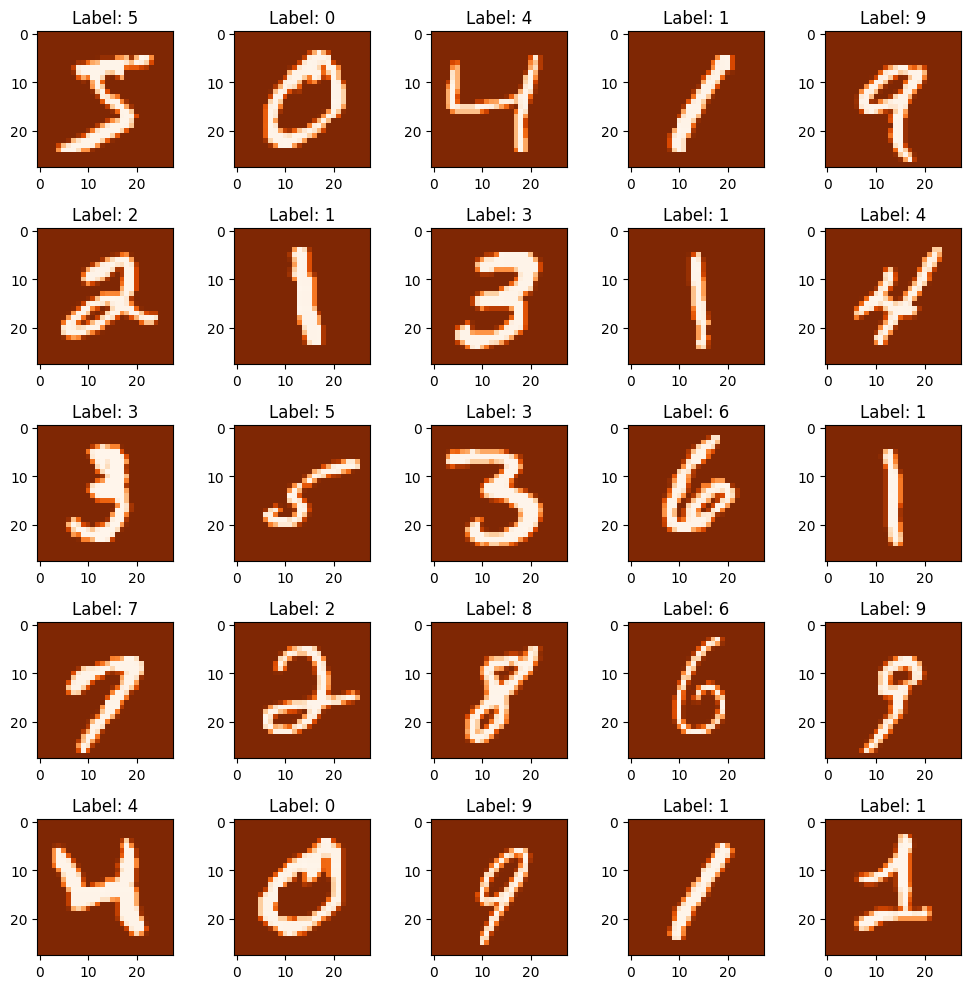

In [ ]:
fig, axes = plt.subplots(nrows = 5 , ncols = 5 , figsize=(10, 10))
for i, ax in enumerate(axes.flatten()):
        ax.imshow(X[i], cmap='Oranges_r')
        ax.set_title(f"Label: {y[i]}")
plt.tight_layout()
plt.show()

# **Feature Extraction using Centroid**

In [ ]:
def calculate_centroids(image, num_blocks):
    block_size = image.shape[0] // num_blocks
    centroids = []
    for i in range(num_blocks):
        for j in range(num_blocks):
            block = image[i * block_size: (i + 1) * block_size, j * block_size: (j + 1) * block_size]
            sum_x, sum_y = np.meshgrid(np.arange(block_size), np.arange(block_size))
            centroid_x = np.sum(block * sum_x) / np.sum(block)
            centroid_y = np.sum(block * sum_y) / np.sum(block)
            centroid = centroid_x, centroid_y
            centroids.append(centroid)
    return np.array(centroids)

In [ ]:
num_blocks_per_side = 3
X_features = np.array([calculate_centroids(image, num_blocks_per_side) for image in X])

<ipython-input-51-2420114fa8a9>:8: RuntimeWarning: invalid value encountered in scalar divide
  centroid_x = np.sum(block * sum_x) / np.sum(block)
<ipython-input-51-2420114fa8a9>:9: RuntimeWarning: invalid value encountered in scalar divide
  centroid_y = np.sum(block * sum_y) / np.sum(block)


# **Split Data into train and Test**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_features, y, test_size=0.3, random_state=42)

# **Classification**

In [ ]:
# Impute missing values with the mean
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train.reshape(X_train.shape[0], -1))
X_test_imputed = imputer.transform(X_test.reshape(X_test.shape[0], -1))

In [ ]:
# Train a classifier
clf = KNeighborsClassifier()
clf.fit(X_train_imputed, y_train)

KNeighborsClassifier()

In [ ]:
# Evaluate the classifier
y_pred = clf.predict(X_test_imputed)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9076190476190477
